In [708]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [709]:
# Load the KDD99 dataset
kdd_column_names = pd.read_csv('datasets/feature_names.csv', header=None)
kdd_names = kdd_column_names.iloc[:,0].values
kdd = pd.read_csv('datasets/kddcup.data_10_percent_corrected', names=kdd_names)

# Data Clean-up

In [710]:
# Copy kdd data to new dataset to perform data pre-processing methods
kdd_copy = kdd.copy()
kdd_copy.to_csv('kdd_copy_multi.csv')

In [711]:
# Find missing values
missing_values_count = (kdd_copy.isnull().sum()) # Check for missing values
print("Number of missing values within each column:")
print(missing_values_count)

Number of missing values within each column:
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  

In [712]:
# Drop duplicate values
kdd_copy.drop_duplicates(keep='first', inplace = True)

In [713]:
# Count unique values and delete columns that have only 1 unique value
n = kdd.nunique(axis=0)
print('Count of all unique values of each column:')
print(n)

Count of all unique values of each column:
duration                        2495
protocol_type                      3
service                           66
flag                              11
src_bytes                       3300
dst_bytes                      10725
land                               2
wrong_fragment                     3
urgent                             4
hot                               22
num_failed_logins                  6
logged_in                          2
num_compromised                   23
root_shell                         2
su_attempted                       3
num_root                          20
num_file_creations                18
num_shells                         3
num_access_files                   7
num_outbound_cmds                  1
is_host_login                      1
is_guest_login                     2
count                            490
srv_count                        470
serror_rate                       92
srv_serror_rate                 

In [714]:
kdd_copy.drop(columns=['num_outbound_cmds', 'is_host_login'],inplace=True)

In [715]:
print('\nCount of all unique values of each column after removing redundant features:')
print(kdd_copy.nunique(axis=0))


Count of all unique values of each column after removing redundant features:
duration                        2495
protocol_type                      3
service                           66
flag                              11
src_bytes                       3300
dst_bytes                      10725
land                               2
wrong_fragment                     3
urgent                             4
hot                               22
num_failed_logins                  6
logged_in                          2
num_compromised                   23
root_shell                         2
su_attempted                       3
num_root                          20
num_file_creations                18
num_shells                         3
num_access_files                   7
is_guest_login                     2
count                            490
srv_count                        470
serror_rate                       92
srv_serror_rate                   51
rerror_rate                       

# Exploratory Data Analysis - EDA

In [716]:
kdd_copy.head()

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   9   
1               0       0    0  ...                  19   
2               0       0    0  ...                  29   
3               0       0    0  ...                  39   
4               0       0    0  ...                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3                     1.0                     0.0   
4                     1.0                     0.0   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.11                          0.0   
1                         0.05                          0.0   
2                         0.03                          0.0   
3                         0.03                          0.0   
4                         0.02                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                   0.0   
1                   0.0                       0.0                   0.0   
2                   0.0                       0.0                   0.0   
3                   0.0                       0.0                   0.0   
4                   0.0                       0.0                   0.0   

   dst_host_srv_rerror_rate  attack_type  
0                       0.0      normal.  
1                       0.0      normal.  
2                       0.0      normal.  
3                       0.0      normal.  
4                       0.0      normal.  

[5 rows x 40 columns]

In [717]:
kdd_copy['attack_type'] = kdd_copy['attack_type'].str.replace('normal.', 'normal')
kdd_copy.head()

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   9   
1               0       0    0  ...                  19   
2               0       0    0  ...                  29   
3               0       0    0  ...                  39   
4               0       0    0  ...                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3                     1.0                     0.0   
4                     1.0                     0.0   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.11                          0.0   
1                         0.05                          0.0   
2                         0.03                          0.0   
3                         0.03                          0.0   
4                         0.02                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                   0.0   
1                   0.0                       0.0                   0.0   
2                   0.0                       0.0                   0.0   
3                   0.0                       0.0                   0.0   
4                   0.0                       0.0                   0.0   

   dst_host_srv_rerror_rate  attack_type  
0                       0.0       normal  
1                       0.0       normal  
2                       0.0       normal  
3                       0.0       normal  
4                       0.0       normal  

[5 rows x 40 columns]

In [718]:
# General information of each Column
kdd_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145586 entries, 0 to 494020
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     145586 non-null  int64  
 1   protocol_type                145586 non-null  object 
 2   service                      145586 non-null  object 
 3   flag                         145586 non-null  object 
 4   src_bytes                    145586 non-null  int64  
 5   dst_bytes                    145586 non-null  int64  
 6   land                         145586 non-null  int64  
 7   wrong_fragment               145586 non-null  int64  
 8   urgent                       145586 non-null  int64  
 9   hot                          145586 non-null  int64  
 10  num_failed_logins            145586 non-null  int64  
 11  logged_in                    145586 non-null  int64  
 12  num_compromised              145586 non-null  int64  
 13 

In [720]:
# Get the names of all columns
kdd_copy.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack_type'],
      dtype='object')

In [721]:
# Statistics
kdd_copy.describe().T

count         mean           std  min    25%  \
duration                     145586.0   132.025181  1.224157e+03  0.0   0.00   
src_bytes                    145586.0  7995.699628  1.820383e+06  0.0   0.00   
dst_bytes                    145586.0  2859.780020  6.080979e+04  0.0   0.00   
land                         145586.0     0.000137  1.171998e-02  0.0   0.00   
wrong_fragment               145586.0     0.020201  2.393680e-01  0.0   0.00   
urgent                       145586.0     0.000048  1.015038e-02  0.0   0.00   
hot                          145586.0     0.100174  1.426798e+00  0.0   0.00   
num_failed_logins            145586.0     0.000515  2.858542e-02  0.0   0.00   
logged_in                    145586.0     0.491490  4.999293e-01  0.0   0.00   
num_compromised              145586.0     0.026177  3.311373e+00  0.0   0.00   
root_shell                   145586.0     0.000378  1.943305e-02  0.0   0.00   
su_attempted                 145586.0     0.000124  1.435444e-02  0.0   0.00   
num_root                     145586.0     0.038520  3.707494e+00  0.0   0.00   
num_file_creations           145586.0     0.003675  1.775812e-01  0.0   0.00   
num_shells                   145586.0     0.000371  2.029761e-02  0.0   0.00   
num_access_files             145586.0     0.003414  6.709079e-02  0.0   0.00   
is_guest_login               145586.0     0.004705  6.843257e-02  0.0   0.00   
count                        145586.0    74.385593  1.003359e+02  0.0   2.00   
srv_count                    145586.0    13.011464  3.073613e+01  0.0   2.00   
serror_rate                  145586.0     0.291379  4.529027e-01  0.0   0.00   
srv_serror_rate              145586.0     0.291551  4.535666e-01  0.0   0.00   
rerror_rate                  145586.0     0.108355  3.089614e-01  0.0   0.00   
srv_rerror_rate              145586.0     0.108412  3.088050e-01  0.0   0.00   
same_srv_rate                145586.0     0.655194  4.467948e-01  0.0   0.08   
diff_srv_rate                145586.0     0.040576  1.203955e-01  0.0   0.00   
srv_diff_host_rate           145586.0     0.093079  2.419522e-01  0.0   0.00   
dst_host_count               145586.0   181.468177  9.909820e+01  0.0  78.00   
dst_host_srv_count           145586.0   129.934678  1.147148e+02  0.0  12.00   
dst_host_same_srv_rate       145586.0     0.553222  4.562364e-01  0.0   0.05   
dst_host_diff_srv_rate       145586.0     0.061389  1.470208e-01  0.0   0.00   
dst_host_same_src_port_rate  145586.0     0.092825  2.411234e-01  0.0   0.00   
dst_host_srv_diff_host_rate  145586.0     0.019048  6.040967e-02  0.0   0.00   
dst_host_serror_rate         145586.0     0.291597  4.524917e-01  0.0   0.00   
dst_host_srv_serror_rate     145586.0     0.290978  4.534473e-01  0.0   0.00   
dst_host_rerror_rate         145586.0     0.110463  3.060970e-01  0.0   0.00   
dst_host_srv_rerror_rate     145586.0     0.107675  3.042197e-01  0.0   0.00   

                                50%      75%          max  
duration                       0.00     0.00      58329.0  
src_bytes                    147.00   288.00  693375640.0  
dst_bytes                    105.00  1164.75    5155468.0  
land                           0.00     0.00          1.0  
wrong_fragment                 0.00     0.00          3.0  
urgent                         0.00     0.00          3.0  
hot                            0.00     0.00         30.0  
num_failed_logins              0.00     0.00          5.0  
logged_in                      0.00     1.00          1.0  
num_compromised                0.00     0.00        884.0  
root_shell                     0.00     0.00          1.0  
su_attempted                   0.00     0.00          2.0  
num_root                       0.00     0.00        993.0  
num_file_creations             0.00     0.00         28.0  
num_shells                     0.00     0.00          2.0  
num_access_files               0.00     0.00          8.0  
is_guest_login                 0.00     0.00       

## Data Visualization

In [722]:
# Count occurence of each attack type
kdd_copy['attack_type'].value_counts()

normal              87832
neptune.            51820
back.                 968
teardrop.             918
satan.                906
warezclient.          893
ipsweep.              651
smurf.                641
portsweep.            416
pod.                  206
nmap.                 158
guess_passwd.          53
buffer_overflow.       30
warezmaster.           20
land.                  19
imap.                  12
rootkit.               10
loadmodule.             9
ftp_write.              8
multihop.               7
phf.                    4
perl.                   3
spy.                    2
Name: attack_type, dtype: int64

Text(0.5, 1.0, 'Data Distribution')

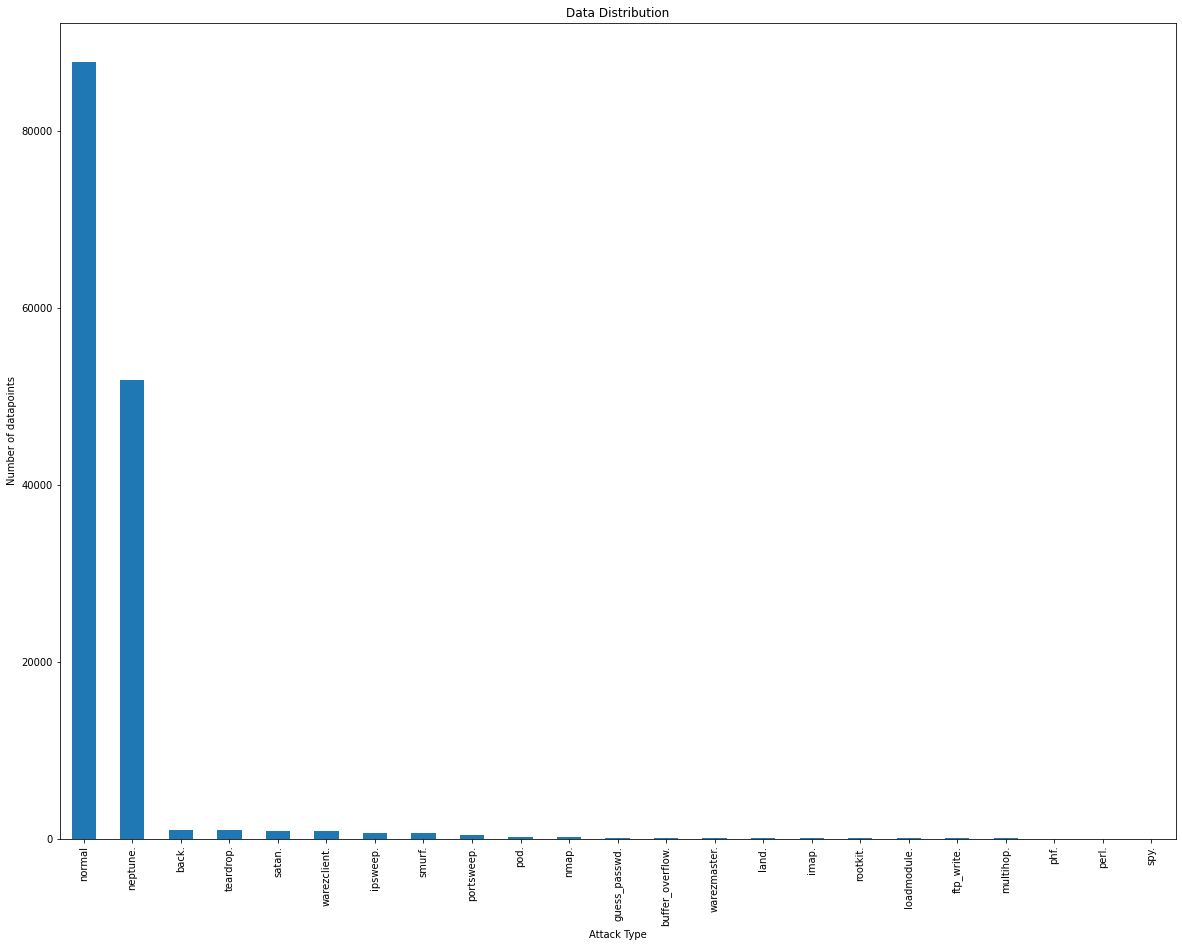

In [723]:
# Plot Datapoint Distributions according to 'attack_type'
plt.figure(figsize=(20,15))
attack_type_distribution = kdd_copy['attack_type'].value_counts()
attack_type_distribution.plot(kind='bar')
plt.xlabel('Attack Type')
plt.ylabel('Number of datapoints')
plt.title('Data Distribution')

In [724]:
# Attack class function to convert 'attack_type' to 'attack_class'
def attack_class(kdd_dataset):
  kdd_dataset.attack_type.replace(['back.', 'neptune.', 'land.', 'pod.', 'smurf.', 'teardrop.'],'Dos',inplace=True)
  kdd_dataset.attack_type.replace(['ftp_write.','guess_passwd.','imap.','multihop.','phf.','spy.','warezclient.','warezmaster.'],'R2L',inplace=True)
  kdd_dataset.attack_type.replace(['ipsweep.','nmap.','portsweep.','satan.'],'Probe.',inplace=True)
  kdd_dataset.attack_type.replace(['buffer_overflow.','loadmodule.','perl.','rootkit.'],'U2R',inplace=True)


In [725]:
# Replace attack types corresponding attack classes
attack_class(kdd_copy)

# Relabel dataset
multi_attack_class = kdd_copy.copy()

In [726]:
# Count number of datapoints for each attack class
multi_attack_class.attack_type.value_counts()

normal    87832
Dos       54572
Probe.     2131
R2L         999
U2R          52
Name: attack_type, dtype: int64

# Encoding Categorical Features

In [727]:
# Get column names of values that are of 'Object' datatype
print(list(multi_attack_class.select_dtypes(['object']).columns))

['protocol_type', 'service', 'flag', 'attack_type']


In [728]:
#kdd_encoded = pd.get_dummies(kdd_copy, columns=['protocol_type', 'service', 'flag', 'attack_type'])
#kdd_copy.head()
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
multi_attack_class['attack_encoded'] = labelencoder.fit_transform(multi_attack_class['attack_type'])
multi_attack_class.head()

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                     1.0   
1               0       0    0  ...                     1.0   
2               0       0    0  ...                     1.0   
3               0       0    0  ...                     1.0   
4               0       0    0  ...                     1.0   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                     0.0                         0.11   
1                     0.0                         0.05   
2                     0.0                         0.03   
3                     0.0                         0.03   
4                     0.0                         0.02   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                          0.0                   0.0   
1                          0.0                   0.0   
2                          0.0                   0.0   
3                          0.0                   0.0   
4                          0.0                   0.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                   0.0                       0.0   
1                       0.0                   0.0                       0.0   
2                       0.0                   0.0                       0.0   
3                       0.0                   0.0                       0.0   
4                       0.0                   0.0                       0.0   

   attack_type  attack_encoded  
0       normal               4  
1       normal               4  
2       normal               4  
3       normal               4  
4       normal               4  

[5 rows x 41 columns]

In [729]:
multi_attack_class['attack_type_copy'] = multi_attack_class['attack_type'].copy(deep=True)
multi_attack_class.head()

duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_diff_srv_rate  \
0               0       0    0  ...                     0.0   
1               0       0    0  ...                     0.0   
2               0       0    0  ...                     0.0   
3               0       0    0  ...                     0.0   
4               0       0    0  ...                     0.0   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.11                          0.0   
1                         0.05                          0.0   
2                         0.03                          0.0   
3                         0.03                          0.0   
4                         0.02                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                   0.0   
1                   0.0                       0.0                   0.0   
2                   0.0                       0.0                   0.0   
3                   0.0                       0.0                   0.0   
4                   0.0                       0.0                   0.0   

   dst_host_srv_rerror_rate  attack_type  attack_encoded  attack_type_copy  
0                       0.0       normal               4            normal  
1                       0.0       normal               4            normal  
2                       0.0       normal               4            normal  
3                       0.0       normal               4            normal  
4                       0.0       normal               4            normal  

[5 rows x 42 columns]

In [791]:
multi_class_data_preprocessed = pd.get_dummies(multi_attack_class, columns=['protocol_type','service','flag', 'attack_type'])
multi_class_data_preprocessed
print(multi_class_data_preprocessed.columns.tolist())

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_encoded', 'attack_type_copy', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', '

In [792]:
multi_class_data_preprocessed
print(multi_class_data_preprocessed.columns.tolist())

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_encoded', 'attack_type_copy', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', '

In [793]:
multi_class_data_preprocessed.to_csv('multi_class_data_preprocessed.csv')
multi_class_data_preprocessed

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0              0        181       5450     0               0       0    0   
1              0        239        486     0               0       0    0   
2              0        235       1337     0               0       0    0   
3              0        219       1337     0               0       0    0   
4              0        217       2032     0               0       0    0   
...          ...        ...        ...   ...             ...     ...  ...   
494016         0        310       1881     0               0       0    0   
494017         0        282       2286     0               0       0    0   
494018         0        203       1200     0               0       0    0   
494019         0        291       1200     0               0       0    0   
494020         0        219       1234     0               0       0    0   

        num_failed_logins  logged_in  num_compromised  ...  flag_S1  flag_S2  \
0                       0          1                0  ...        0        0   
1                       0          1                0  ...        0        0   
2                       0          1                0  ...        0        0   
3                       0          1                0  ...        0        0   
4                       0          1                0  ...        0        0   
...                   ...        ...              ...  ...      ...      ...   
494016                  0          1                0  ...        0        0   
494017                  0          1                0  ...        0        0   
494018                  0          1                0  ...        0        0   
494019                  0          1                0  ...        0        0   
494020                  0          1                0  ...        0        0   

        flag_S3  flag_SF  flag_SH  attack_type_Dos  attack_type_Probe.  \
0             0        1        0                0                   0   
1             0        1        0                0                   0   
2             0        1        0                0                   0   
3             0        1        0                0                   0   
4             0        1        0                0                   0   
...         ...      ...      ...              ...                 ...   
494016        0        1        0                0                   0   
494017        0        1        0                0                   0   
494018        0        1        0                0                   0   
494019        0        1        0                0                   0   
494020        0        1        0                0                   0   

        attack_type_R2L  attack_type_U2R  attack_type_normal  
0                     0                0                   1  
1                     0                0                   1  
2                     0                0                   1  
3                     0                0                   1  
4                     0                0                   1  
...                 ...              ...                 ...  
494016                0                0                   1  
494017                0                0                   1  
494018                0                0                   1  
494019                0                0                   1  
494020                0                0                   1  

[145586 rows x 123 columns]

In [794]:
multi_class_data_preprocessed = multi_class_data_preprocessed.rename(columns={'attack_type_Probe.': 'attack_type_Probe', 'attack_type_normal.': 'attack_type_normal'})

In [795]:
print(multi_class_data_preprocessed.columns.tolist())

['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_encoded', 'attack_type_copy', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', '

In [796]:
# check for object datatypes
multi_class_data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145586 entries, 0 to 494020
Columns: 123 entries, duration to attack_type_normal
dtypes: float64(15), int32(1), int64(21), object(1), uint8(85)
memory usage: 54.6+ MB


# Data Visuals

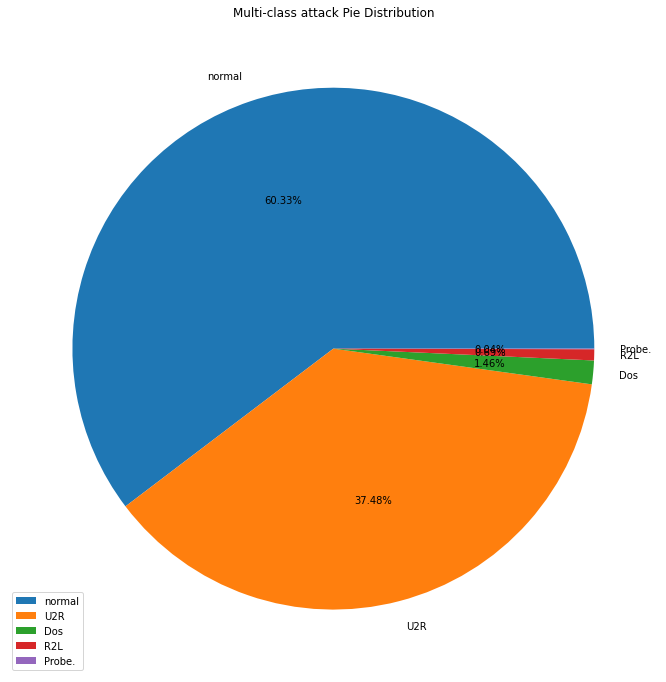

In [735]:
# importing library for plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.pie(multi_attack_class.attack_type.value_counts(),labels=multi_attack_class.attack_type.unique(),autopct='%0.2f%%')
plt.title('Multi-class attack Pie Distribution')
plt.legend()
plt.show()

# Split train and test set

In [797]:
# Split data into features(x = used to predict labels) and labels (y = data we want to predict)
x = multi_class_data_preprocessed.drop(columns=['attack_type_copy','attack_encoded', 'attack_type_Dos', 'attack_type_Probe', 'attack_type_R2L', 'attack_type_U2R', 'attack_type_normal'])
y = multi_class_data_preprocessed.filter(['attack_type_copy','attack_encoded','attack_type_Dos', 'attack_type_Probe', 'attack_type_R2L','attack_type_U2R','attack_type_normal'])

In [798]:
x.head()

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0         0        181       5450     0               0       0    0   
1         0        239        486     0               0       0    0   
2         0        235       1337     0               0       0    0   
3         0        219       1337     0               0       0    0   
4         0        217       2032     0               0       0    0   

   num_failed_logins  logged_in  num_compromised  ...  flag_REJ  flag_RSTO  \
0                  0          1                0  ...         0          0   
1                  0          1                0  ...         0          0   
2                  0          1                0  ...         0          0   
3                  0          1                0  ...         0          0   
4                  0          1                0  ...         0          0   

   flag_RSTOS0  flag_RSTR  flag_S0  flag_S1  flag_S2  flag_S3  flag_SF  \
0            0          0        0        0        0        0        1   
1            0          0        0        0        0        0        1   
2            0          0        0        0        0        0        1   
3            0          0        0        0        0        0        1   
4            0          0        0        0        0        0        1   

   flag_SH  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 116 columns]

In [799]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145586 entries, 0 to 494020
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   attack_type_copy    145586 non-null  object
 1   attack_encoded      145586 non-null  int32 
 2   attack_type_Dos     145586 non-null  uint8 
 3   attack_type_Probe   145586 non-null  uint8 
 4   attack_type_R2L     145586 non-null  uint8 
 5   attack_type_U2R     145586 non-null  uint8 
 6   attack_type_normal  145586 non-null  uint8 
dtypes: int32(1), object(1), uint8(5)
memory usage: 3.5+ MB


In [800]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit_transform(x.values)
x_scaled = pd.DataFrame(scaler, index=x.index, columns=x.columns)
x_scaled

duration  src_bytes  dst_bytes      land  wrong_fragment    urgent  \
0       -0.10785  -0.004293   0.042596 -0.011722       -0.084394 -0.004737   
1       -0.10785  -0.004261  -0.039036 -0.011722       -0.084394 -0.004737   
2       -0.10785  -0.004263  -0.025042 -0.011722       -0.084394 -0.004737   
3       -0.10785  -0.004272  -0.025042 -0.011722       -0.084394 -0.004737   
4       -0.10785  -0.004273  -0.013613 -0.011722       -0.084394 -0.004737   
...          ...        ...        ...       ...             ...       ...   
494016  -0.10785  -0.004222  -0.016096 -0.011722       -0.084394 -0.004737   
494017  -0.10785  -0.004237  -0.009436 -0.011722       -0.084394 -0.004737   
494018  -0.10785  -0.004281  -0.027295 -0.011722       -0.084394 -0.004737   
494019  -0.10785  -0.004232  -0.027295 -0.011722       -0.084394 -0.004737   
494020  -0.10785  -0.004272  -0.026736 -0.011722       -0.084394 -0.004737   

            hot  num_failed_logins  logged_in  num_compromised  ...  flag_REJ  \
0      -0.07021          -0.018022   1.017168        -0.007905  ... -0.335281   
1      -0.07021          -0.018022   1.017168        -0.007905  ... -0.335281   
2      -0.07021          -0.018022   1.017168        -0.007905  ... -0.335281   
3      -0.07021          -0.018022   1.017168        -0.007905  ... -0.335281   
4      -0.07021          -0.018022   1.017168        -0.007905  ... -0.335281   
...         ...                ...        ...              ...  ...       ...   
494016 -0.07021          -0.018022   1.017168        -0.007905  ... -0.335281   
494017 -0.07021          -0.018022   1.017168        -0.007905  ... -0.335281   
494018 -0.07021          -0.018022   1.017168        -0.007905  ... -0.335281   
494019 -0.07021          -0.018022   1.017168        -0.007905  ... -0.335281   
494020 -0.07021          -0.018022   1.017168        -0.007905  ... -0.335281   

        flag_RSTO  flag_RSTOS0  flag_RSTR  flag_S0   flag_S1  flag_S2  \
0       -0.062639    -0.008693  -0.054109 -0.63972 -0.019791 -0.01284   
1       -0.062639    -0.008693  -0.054109 -0.63972 -0.019791 -0.01284   
2       -0.062639    -0.008693  -0.054109 -0.63972 -0.019791 -0.01284   
3       -0.062639    -0.008693  -0.054109 -0.63972 -0.019791 -0.01284   
4       -0.062639    -0.008693  -0.054109 -0.63972 -0.019791 -0.01284   
...           ...          ...        ...      ...       ...      ...   
494016  -0.062639    -0.008693  -0.054109 -0.63972 -0.019791 -0.01284   
494017  -0.062639    -0.008693  -0.054109 -0.63972 -0.019791 -0.01284   
494018  -0.062639    -0.008693  -0.054109 -0.63972 -0.019791 -0.01284   
494019  -0.062639    -0.008693  -0.054109 -0.63972 -0.019791 -0.01284   
494020  -0.062639    -0.008693  -0.054109 -0.63972 -0.019791 -0.01284   

         flag_S3   flag_SF   flag_SH  
0      -0.008288  0.815242 -0.015284  
1      -0.008288  0.815242 -0.015284  
2      -0.008288  0.815242 -0.015284  
3      -0.008288  0.815242 -0.015284  
4      -0.008288  0.815242 -0.015284  
...          ...       ...       ...  
494016 -0.008288  0.815242 -0.015284  
494017 -0.008288  0.815242 -0.015284  
494018 -0.008288  0.815242 -0.015284  
494019 -0.008288  0.815242 -0.015284  
494020 -0.008288  0.815242 -0.015284  

[145586 rows x 116 columns]

In [850]:
# Separate train and test sets from dataset 
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=0)
x_train.head()
y_train

attack_type_copy  attack_encoded  attack_type_Dos  attack_type_Probe  \
29208            normal               4                0                  0   
493576           normal               4                0                  0   
53416            normal               4                0                  0   
19001            normal               4                0                  0   
359043              Dos               0                1                  0   
...                 ...             ...              ...                ...   
55297               Dos               0                1                  0   
354315              Dos               0                1                  0   
352191              Dos               0                1                  0   
387122              Dos               0                1                  0   
57270               Dos               0                1                  0   

        attack_type_R2L  attack_type_U2R  attack_type_normal  
29208                 0                0                   1  
493576                0                0                   1  
53416                 0                0                   1  
19001                 0                0                   1  
359043                0                0                   0  
...                 ...              ...                 ...  
55297                 0                0                   0  
354315                0                0                   0  
352191                0                0                   0  
387122                0                0                   0  
57270                 0                0                   0  

[116468 rows x 7 columns]

In [851]:
x_train.shape, x_test.shape

((116468, 116), (29118, 116))

In [852]:
y_train.shape, y_test.shape

((116468, 7), (29118, 7))

In [853]:
# from sklearn.preprocessing import StandardScaler
# # Feature Scaling
# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)


In [854]:
x_test_scaled

array([[-0.00446853, -0.04773029, -0.98353019, ...,  1.40024983,
         1.56445926, -1.22593308],
       [-0.00430878, -0.04098278,  1.01674561, ..., -0.71415827,
        -0.63919849,  0.81570521],
       [-0.00434171, -0.04299374,  1.01674561, ..., -0.71415827,
        -0.63919849,  0.81570521],
       ...,
       [-0.00432303, -0.02421374,  1.01674561, ..., -0.71415827,
        -0.63919849,  0.81570521],
       [-0.00430091, -0.04016843,  1.01674561, ..., -0.71415827,
        -0.63919849,  0.81570521],
       [-0.00432057,  0.02551171,  1.01674561, ..., -0.71415827,
        -0.63919849,  0.81570521]])

In [892]:
# Full features train and test set
x_train_full_features = x_train.copy(deep=True)
x_test_full_features = x_test.copy(deep=True)
x_train_full_features.head()

duration  src_bytes  dst_bytes      land  wrong_fragment    urgent  \
29208  -0.107850  -0.004279  -0.025256 -0.011722       -0.084394 -0.004737   
493576 -0.107850  -0.004248  -0.003713 -0.011722       -0.084394 -0.004737   
53416  -0.103766  -0.003946  -0.041536 -0.011722       -0.084394 -0.004737   
19001  -0.107850  -0.004234  -0.003318 -0.011722       -0.084394 -0.004737   
359043 -0.107850  -0.004392  -0.047028 -0.011722       -0.084394 -0.004737   

            hot  num_failed_logins  logged_in  num_compromised  ...  flag_REJ  \
29208  -0.07021          -0.018022   1.017168        -0.007905  ... -0.335281   
493576 -0.07021          -0.018022   1.017168        -0.007905  ... -0.335281   
53416  -0.07021          -0.018022   1.017168        -0.007905  ... -0.335281   
19001  -0.07021          -0.018022   1.017168        -0.007905  ... -0.335281   
359043 -0.07021          -0.018022  -0.983122        -0.007905  ... -0.335281   

        flag_RSTO  flag_RSTOS0  flag_RSTR   flag_S0   flag_S1  flag_S2  \
29208   -0.062639    -0.008693  -0.054109 -0.639720 -0.019791 -0.01284   
493576  -0.062639    -0.008693  -0.054109 -0.639720 -0.019791 -0.01284   
53416   -0.062639    -0.008693  -0.054109 -0.639720 -0.019791 -0.01284   
19001   -0.062639    -0.008693  -0.054109 -0.639720 -0.019791 -0.01284   
359043  -0.062639    -0.008693  -0.054109  1.563183 -0.019791 -0.01284   

         flag_S3   flag_SF   flag_SH  
29208  -0.008288  0.815242 -0.015284  
493576 -0.008288  0.815242 -0.015284  
53416  -0.008288  0.815242 -0.015284  
19001  -0.008288  0.815242 -0.015284  
359043 -0.008288 -1.226629 -0.015284  

[5 rows x 116 columns]

# Feature Selection Analysis

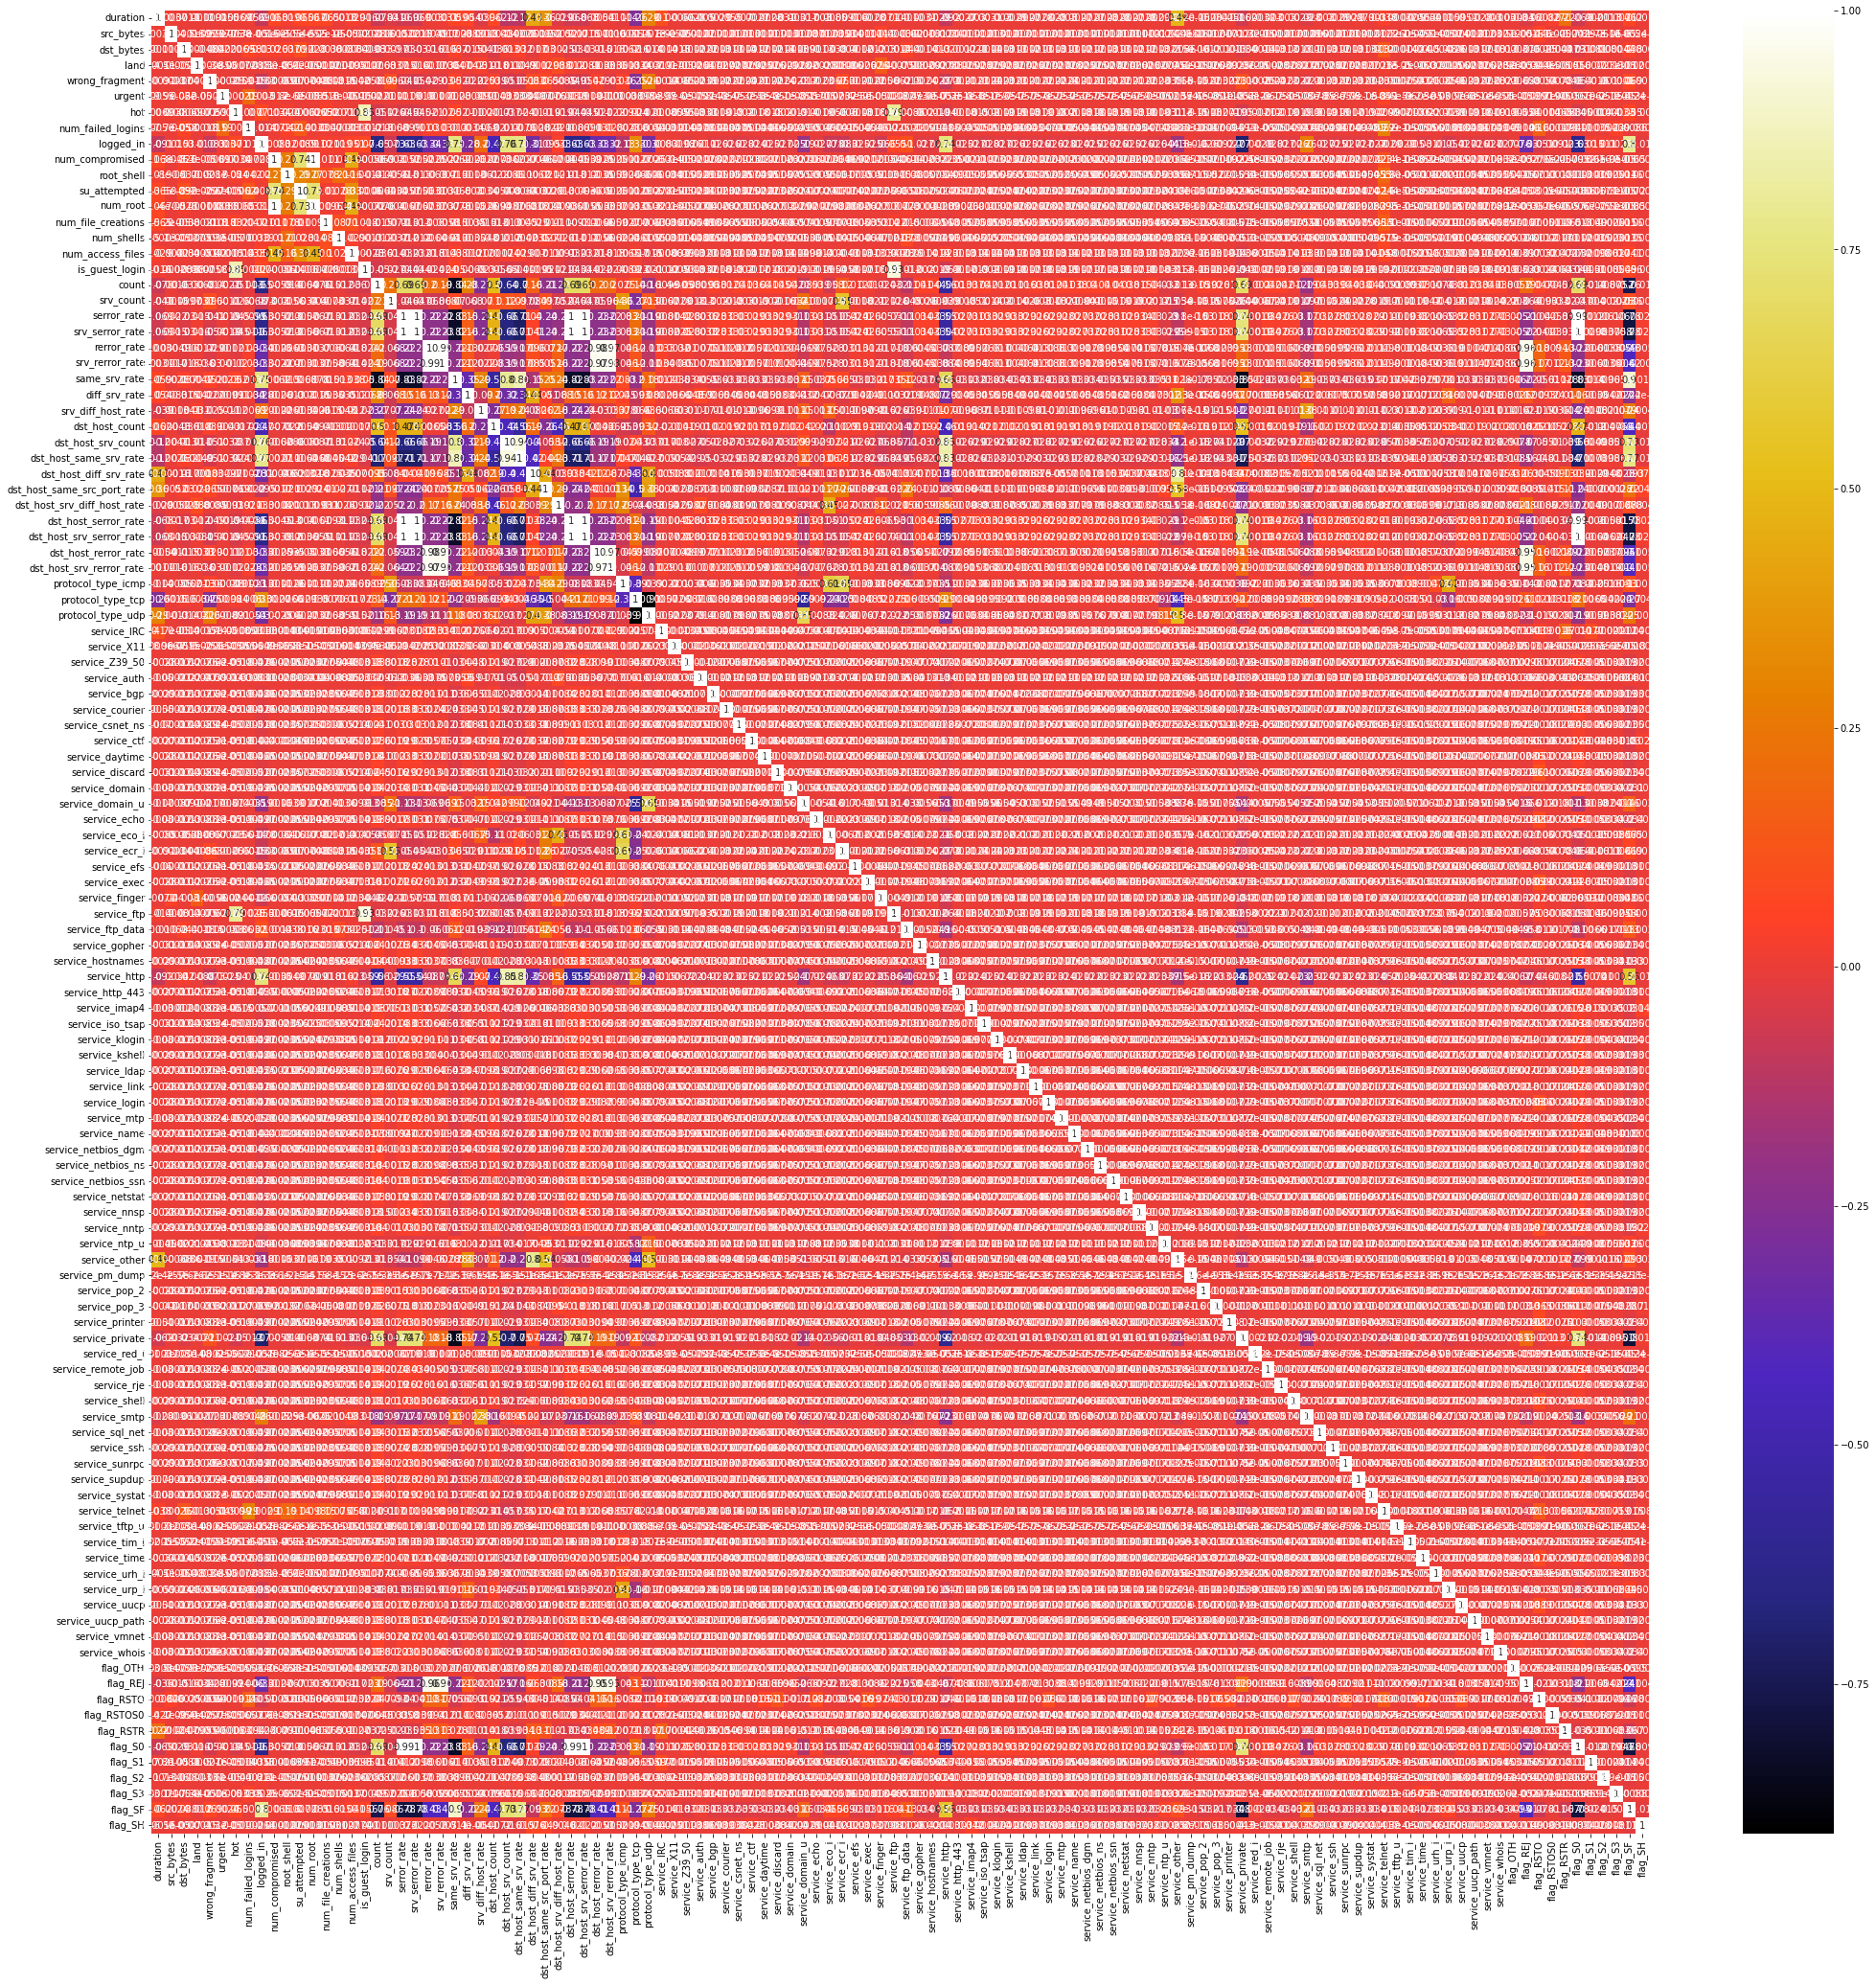

                duration  src_bytes  dst_bytes      land  wrong_fragment  \
duration        1.000000   0.003658   0.001092 -0.001096       -0.009092   
src_bytes       0.003658   1.000000  -0.000181 -0.000045       -0.000371   
dst_bytes       0.001092  -0.000181   1.000000 -0.000485       -0.004019   
land           -0.001096  -0.000045  -0.000485  1.000000       -0.000855   
wrong_fragment -0.009092  -0.000371  -0.004019 -0.000855        1.000000   
...                  ...        ...        ...       ...             ...   
flag_S1        -0.002099   0.000078   0.008101 -0.000197       -0.001637   
flag_S2        -0.001324   0.000002   0.007952 -0.000126       -0.001047   
flag_S3        -0.000714  -0.000031   0.000439 -0.000073       -0.000604   
flag_SF         0.062088  -0.002391   0.038072 -0.012444        0.068684   
flag_SH        -0.001582  -0.000065  -0.000699 -0.000149       -0.001234   

                  urgent       hot  num_failed_logins  logged_in  \
duration        0.0

In [745]:
# Pearson Correlation
plt.figure(figsize=(35,35))
x_train_corr = x_train.corr()
sns.heatmap(x_train_corr,annot=True, cmap= plt.cm.CMRmap)
plt.show()
print(x_train_corr)

In [746]:
y_train.filter(['attack_type_copy'])

attack_type_copy
29208            normal
493576           normal
53416            normal
19001            normal
359043              Dos
...                 ...
55297               Dos
354315              Dos
352191              Dos
387122              Dos
57270               Dos

[116468 rows x 1 columns]

In [747]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information(Values are between 0 and 1)
# 0 = Feature is independent from the target
# 1 = Feature dependency on the target is high (most important feature)
mutual_information = mutual_info_classif(x_train, y_train['attack_type_copy'])
mutual_information

array([4.30577273e-02, 5.96203387e-01, 4.69319887e-01, 2.16153731e-03,
       1.17194472e-02, 8.08392645e-04, 2.01649588e-02, 0.00000000e+00,
       3.60640293e-01, 9.60480432e-03, 2.70177362e-03, 2.16731092e-03,
       4.48036059e-03, 4.20185026e-03, 0.00000000e+00, 5.18395456e-04,
       1.12747163e-02, 5.67587256e-01, 1.13725922e-01, 4.22411125e-01,
       4.02789714e-01, 4.92637129e-02, 3.23590231e-02, 5.79947505e-01,
       5.87715353e-01, 1.29304454e-01, 2.41033264e-01, 4.87552796e-01,
       4.92117769e-01, 5.00465089e-01, 2.52031860e-01, 2.42040253e-01,
       4.25449126e-01, 4.07669364e-01, 5.67977474e-02, 5.68081702e-02,
       1.38243158e-02, 2.59517074e-02, 2.76664513e-02, 1.53437214e-05,
       1.02115486e-03, 1.26128650e-03, 0.00000000e+00, 2.68267689e-03,
       4.30153591e-04, 2.11638652e-03, 2.37544549e-04, 2.96816854e-03,
       0.00000000e+00, 0.00000000e+00, 2.02932974e-02, 1.32771617e-03,
       1.57505419e-02, 4.33892575e-03, 2.62316572e-03, 8.89307840e-05,
      

In [748]:
# Sort mutual information values according to each feature from highest to lowest
mutual_information = pd.Series(mutual_information)
mutual_information.index = x_train.columns
mutual_information.sort_values(ascending=False)

src_bytes                 0.596203
diff_srv_rate             0.587715
same_srv_rate             0.579948
count                     0.567587
dst_host_diff_srv_rate    0.500465
                            ...   
service_auth              0.000000
service_shell             0.000000
service_rje               0.000000
service_red_i             0.000000
service_netbios_ns        0.000000
Length: 116, dtype: float64

<AxesSubplot:>

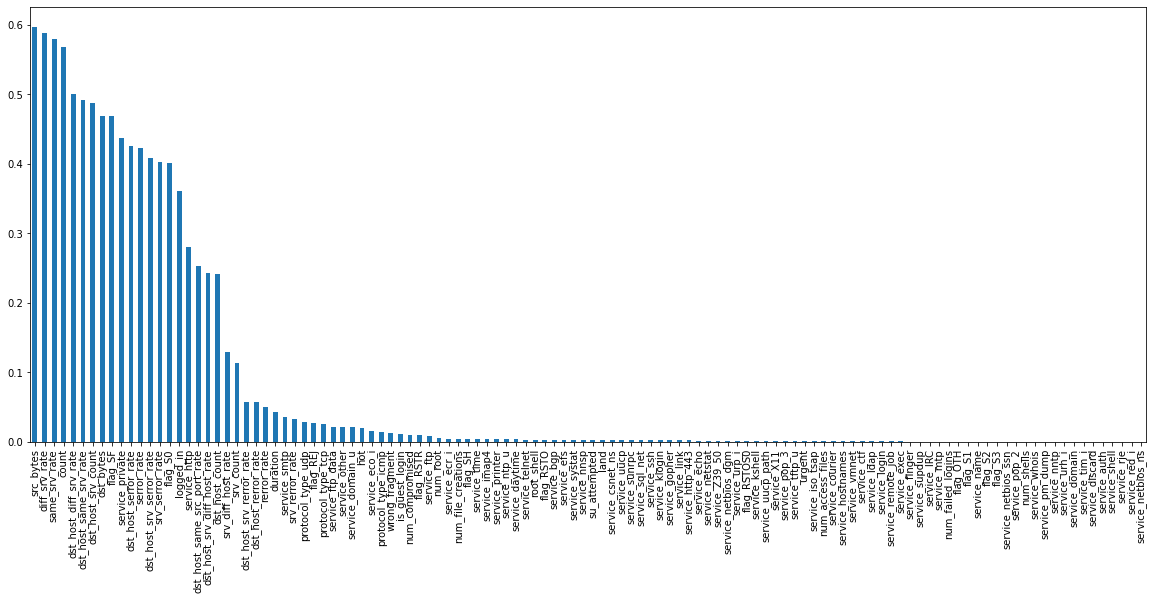

In [749]:
# Plot mutual information values per feature
mutual_information.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [750]:
# Import SelectKBest library to use for feature selection
from sklearn.feature_selection import SelectKBest
x_train

duration  src_bytes  dst_bytes      land  wrong_fragment    urgent  \
29208  -0.107850  -0.004279  -0.025256 -0.011722       -0.084394 -0.004737   
493576 -0.107850  -0.004248  -0.003713 -0.011722       -0.084394 -0.004737   
53416  -0.103766  -0.003946  -0.041536 -0.011722       -0.084394 -0.004737   
19001  -0.107850  -0.004234  -0.003318 -0.011722       -0.084394 -0.004737   
359043 -0.107850  -0.004392  -0.047028 -0.011722       -0.084394 -0.004737   
...          ...        ...        ...       ...             ...       ...   
55297  -0.107850  -0.004392  -0.047028 -0.011722       -0.084394 -0.004737   
354315 -0.107850  -0.004392  -0.047028 -0.011722       -0.084394 -0.004737   
352191 -0.107850  -0.004392  -0.047028 -0.011722       -0.084394 -0.004737   
387122 -0.107850  -0.004392  -0.047028 -0.011722       -0.084394 -0.004737   
57270  -0.107850  -0.004392  -0.047028 -0.011722       -0.084394 -0.004737   

            hot  num_failed_logins  logged_in  num_compromised  ...  flag_REJ  \
29208  -0.07021          -0.018022   1.017168        -0.007905  ... -0.335281   
493576 -0.07021          -0.018022   1.017168        -0.007905  ... -0.335281   
53416  -0.07021          -0.018022   1.017168        -0.007905  ... -0.335281   
19001  -0.07021          -0.018022   1.017168        -0.007905  ... -0.335281   
359043 -0.07021          -0.018022  -0.983122        -0.007905  ... -0.335281   
...         ...                ...        ...              ...  ...       ...   
55297  -0.07021          -0.018022  -0.983122        -0.007905  ... -0.335281   
354315 -0.07021          -0.018022  -0.983122        -0.007905  ... -0.335281   
352191 -0.07021          -0.018022  -0.983122        -0.007905  ... -0.335281   
387122 -0.07021          -0.018022  -0.983122        -0.007905  ... -0.335281   
57270  -0.07021          -0.018022  -0.983122        -0.007905  ... -0.335281   

        flag_RSTO  flag_RSTOS0  flag_RSTR   flag_S0   flag_S1  flag_S2  \
29208   -0.062639    -0.008693  -0.054109 -0.639720 -0.019791 -0.01284   
493576  -0.062639    -0.008693  -0.054109 -0.639720 -0.019791 -0.01284   
53416   -0.062639    -0.008693  -0.054109 -0.639720 -0.019791 -0.01284   
19001   -0.062639    -0.008693  -0.054109 -0.639720 -0.019791 -0.01284   
359043  -0.062639    -0.008693  -0.054109  1.563183 -0.019791 -0.01284   
...           ...          ...        ...       ...       ...      ...   
55297   -0.062639    -0.008693  -0.054109  1.563183 -0.019791 -0.01284   
354315  -0.062639    -0.008693  -0.054109  1.563183 -0.019791 -0.01284   
352191  -0.062639    -0.008693  -0.054109  1.563183 -0.019791 -0.01284   
387122  -0.062639    -0.008693  -0.054109  1.563183 -0.019791 -0.01284   
57270   -0.062639    -0.008693  -0.054109  1.563183 -0.019791 -0.01284   

         flag_S3   flag_SF   flag_SH  
29208  -0.008288  0.815242 -0.015284  
493576 -0.008288  0.815242 -0.015284  
53416  -0.008288  0.815242 -0.015284  
19001  -0.008288  0.815242 -0.015284  
359043 -0.008288 -1.226629 -0.015284  
...          ...       ...       ...  
55297  -0.008288 -1.226629 -0.015284  
354315 -0.008288 -1.226629 -0.015284  
352191 -0.008288 -1.226629 -0.015284  
387122 -0.008288 -1.226629 -0.015284  
57270  -0.008288 -1.226629 -0.015284  

[116468 rows x 116 columns]

In [751]:
# Apply SelectKBest to extract top 20 important features
select_top_20_features = SelectKBest(mutual_info_classif, k = 20)
select_top_20_features.fit(x_train, y_train['attack_type_copy'])
twenty_features = x_train.columns[select_top_20_features.get_support()]

In [752]:
# Convert to list
twenty_features.tolist()

['src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'service_http',
 'service_private',
 'flag_S0',
 'flag_SF']

duration  src_bytes  dst_bytes      land  wrong_fragment    urgent  \
29208  -0.107850  -0.004279  -0.025256 -0.011722       -0.084394 -0.004737   
493576 -0.107850  -0.004248  -0.003713 -0.011722       -0.084394 -0.004737   
53416  -0.103766  -0.003946  -0.041536 -0.011722       -0.084394 -0.004737   
19001  -0.107850  -0.004234  -0.003318 -0.011722       -0.084394 -0.004737   
359043 -0.107850  -0.004392  -0.047028 -0.011722       -0.084394 -0.004737   
...          ...        ...        ...       ...             ...       ...   
55297  -0.107850  -0.004392  -0.047028 -0.011722       -0.084394 -0.004737   
354315 -0.107850  -0.004392  -0.047028 -0.011722       -0.084394 -0.004737   
352191 -0.107850  -0.004392  -0.047028 -0.011722       -0.084394 -0.004737   
387122 -0.107850  -0.004392  -0.047028 -0.011722       -0.084394 -0.004737   
57270  -0.107850  -0.004392  -0.047028 -0.011722       -0.084394 -0.004737   

            hot  num_failed_logins  logged_in  num_compromised  ...  flag_REJ  \
29208  -0.07021          -0.018022   1.017168        -0.007905  ... -0.335281   
493576 -0.07021          -0.018022   1.017168        -0.007905  ... -0.335281   
53416  -0.07021          -0.018022   1.017168        -0.007905  ... -0.335281   
19001  -0.07021          -0.018022   1.017168        -0.007905  ... -0.335281   
359043 -0.07021          -0.018022  -0.983122        -0.007905  ... -0.335281   
...         ...                ...        ...              ...  ...       ...   
55297  -0.07021          -0.018022  -0.983122        -0.007905  ... -0.335281   
354315 -0.07021          -0.018022  -0.983122        -0.007905  ... -0.335281   
352191 -0.07021          -0.018022  -0.983122        -0.007905  ... -0.335281   
387122 -0.07021          -0.018022  -0.983122        -0.007905  ... -0.335281   
57270  -0.07021          -0.018022  -0.983122        -0.007905  ... -0.335281   

        flag_RSTO  flag_RSTOS0  flag_RSTR   flag_S0   flag_S1  flag_S2  \
29208   -0.062639    -0.008693  -0.054109 -0.639720 -0.019791 -0.01284   
493576  -0.062639    -0.008693  -0.054109 -0.639720 -0.019791 -0.01284   
53416   -0.062639    -0.008693  -0.054109 -0.639720 -0.019791 -0.01284   
19001   -0.062639    -0.008693  -0.054109 -0.639720 -0.019791 -0.01284   
359043  -0.062639    -0.008693  -0.054109  1.563183 -0.019791 -0.01284   
...           ...          ...        ...       ...       ...      ...   
55297   -0.062639    -0.008693  -0.054109  1.563183 -0.019791 -0.01284   
354315  -0.062639    -0.008693  -0.054109  1.563183 -0.019791 -0.01284   
352191  -0.062639    -0.008693  -0.054109  1.563183 -0.019791 -0.01284   
387122  -0.062639    -0.008693  -0.054109  1.563183 -0.019791 -0.01284   
57270   -0.062639    -0.008693  -0.054109  1.563183 -0.019791 -0.01284   

         flag_S3   flag_SF   flag_SH  
29208  -0.008288  0.815242 -0.015284  
493576 -0.008288  0.815242 -0.015284  
53416  -0.008288  0.815242 -0.015284  
19001  -0.008288  0.815242 -0.015284  
359043 -0.008288 -1.226629 -0.015284  
...          ...       ...       ...  
55297  -0.008288 -1.226629 -0.015284  
354315 -0.008288 -1.226629 -0.015284  
352191 -0.008288 -1.226629 -0.015284  
387122 -0.008288 -1.226629 -0.015284  
57270  -0.008288 -1.226629 -0.015284  

[116468 rows x 116 columns]

In [753]:
x_train = x_train[['src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'service_http',
 'service_private',
 'flag_S0',
 'flag_SF']]

In [754]:
x_train.head()

src_bytes  dst_bytes  logged_in     count  serror_rate  \
29208   -0.004279  -0.025256   1.017168 -0.591870    -0.643361   
493576  -0.004248  -0.003713   1.017168 -0.671602    -0.643361   
53416   -0.003946  -0.041536   1.017168 -0.731401    -0.643361   
19001   -0.004234  -0.003318   1.017168 -0.382572    -0.643361   
359043  -0.004392  -0.047028  -0.983122  0.384852     1.564627   

        srv_serror_rate  same_srv_rate  diff_srv_rate  dst_host_count  \
29208         -0.642799       0.771735      -0.337021       -1.679836   
493576        -0.642799       0.771735      -0.337021       -1.760565   
53416         -0.642799       0.771735      -0.337021       -0.489094   
19001         -0.642799       0.771735      -0.337021       -0.640460   
359043         1.561957      -1.220238       0.161338        0.742012   

        dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
29208             1.090232                0.979272               -0.417555   
493576            1.090232                0.979272               -0.417555   
53416             0.340544                0.409390               -0.213502   
19001             1.090232                0.979272               -0.417555   
359043           -0.975768               -1.059152                0.058570   

        dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
29208                     -0.094661                     0.181301   
493576                     0.195648                     0.512375   
53416                     -0.343497                    -0.149773   
19001                     -0.343497                     0.181301   
359043                    -0.384970                    -0.315310   

        dst_host_serror_rate  dst_host_srv_serror_rate  service_http  \
29208              -0.644428                 -0.641705      1.160223   
493576             -0.644428                 -0.641705      1.160223   
53416              -0.644428                 -0.641705     -0.861903   
19001              -0.644428                 -0.641705      1.160223   
359043              1.565565                  1.563630     -0.861903   

        service_private   flag_S0   flag_SF  
29208         -0.712888 -0.639720  0.815242  
493576        -0.712888 -0.639720  0.815242  
53416         -0.712888 -0.639720  0.815242  
19001         -0.712888 -0.639720  0.815242  
359043         1.402744  1.563183 -1.226629

In [755]:
x_test = x_test[['src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'serror_rate',
 'srv_serror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'service_http',
 'service_private',
 'flag_S0',
 'flag_SF']]

In [756]:
x_test.head()

src_bytes  dst_bytes  logged_in     count  serror_rate  \
353752  -0.004392  -0.047028  -0.983122  0.604117     1.564627   
33623   -0.004214  -0.040352   1.017168 -0.651669    -0.643361   
139040  -0.004251  -0.042342   1.017168 -0.641702    -0.643361   
17647   -0.004253  -0.039579   1.017168 -0.631736    -0.643361   
6859    -0.003810  -0.042457   1.017168 -0.731401    -0.643361   

        srv_serror_rate  same_srv_rate  diff_srv_rate  dst_host_count  \
353752         1.561957      -1.354528       0.161338        0.742012   
33623         -0.642799       0.771735      -0.337021        0.742012   
139040        -0.642799       0.771735      -0.337021       -0.024906   
17647         -0.642799       0.771735      -0.337021        0.742012   
6859          -0.642799       0.771735      -0.337021        0.742012   

        dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  \
353752           -1.036789               -1.124908               -0.009448   
33623             1.090232                0.979272               -0.417555   
139040            1.090232                0.979272               -0.417555   
17647             1.090232                0.979272               -0.417555   
6859              0.602063                0.497064               -0.281520   

        dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
353752                    -0.384970                    -0.315310   
33623                     -0.384970                    -0.315310   
139040                    -0.343497                    -0.149773   
17647                     -0.384970                    -0.315310   
6859                      -0.384970                    -0.315310   

        dst_host_serror_rate  dst_host_srv_serror_rate  service_http  \
353752              1.565565                  1.563630     -0.861903   
33623              -0.644428                 -0.641705      1.160223   
139040             -0.644428                 -0.641705      1.160223   
17647              -0.644428                 -0.641705      1.160223   
6859               -0.644428                 -0.641705     -0.861903   

        service_private   flag_S0   flag_SF  
353752         1.402744  1.563183 -1.226629  
33623         -0.712888 -0.639720  0.815242  
139040        -0.712888 -0.639720  0.815242  
17647         -0.712888 -0.639720  0.815242  
6859          -0.712888 -0.639720  0.815242

In [857]:
y_train = y_train[['attack_type_Dos','attack_type_Probe','attack_type_R2L','attack_type_U2R','attack_type_normal']]
y_train

attack_type_Dos  attack_type_Probe  attack_type_R2L  attack_type_U2R  \
29208                 0                  0                0                0   
493576                0                  0                0                0   
53416                 0                  0                0                0   
19001                 0                  0                0                0   
359043                1                  0                0                0   
...                 ...                ...              ...              ...   
55297                 1                  0                0                0   
354315                1                  0                0                0   
352191                1                  0                0                0   
387122                1                  0                0                0   
57270                 1                  0                0                0   

        attack_type_normal  
29208                    1  
493576                   1  
53416                    1  
19001                    1  
359043                   0  
...                    ...  
55297                    0  
354315                   0  
352191                   0  
387122                   0  
57270                    0  

[116468 rows x 5 columns]

In [809]:
y_train.columns

Index(['attack_type_Dos', 'attack_type_Probe', 'attack_type_R2L',
       'attack_type_U2R', 'attack_type_normal'],
      dtype='object')

In [858]:
y_test = y_test[['attack_type_Dos','attack_type_Probe','attack_type_R2L','attack_type_U2R','attack_type_normal']]
y_test

attack_type_Dos  attack_type_Probe  attack_type_R2L  attack_type_U2R  \
353752                1                  0                0                0   
33623                 0                  0                0                0   
139040                0                  0                0                0   
17647                 0                  0                0                0   
6859                  0                  0                0                0   
...                 ...                ...              ...              ...   
86565                 1                  0                0                0   
77160                 0                  0                1                0   
232                   0                  0                0                0   
32918                 0                  0                0                0   
22976                 0                  0                0                0   

        attack_type_normal  
353752                   0  
33623                    1  
139040                   1  
17647                    1  
6859                     1  
...                    ...  
86565                    0  
77160                    0  
232                      1  
32918                    1  
22976                    1  

[29118 rows x 5 columns]

In [856]:
y_test.columns

Index(['attack_type_Dos', 'attack_type_Probe', 'attack_type_R2L',
       'attack_type_U2R', 'attack_type_normal'],
      dtype='object')

In [810]:
# correlated_features = set()
# for i in range(len(x_train_corr.columns)):
#     for j in range(i):
#         if abs(x_train_corr.iloc[i,j]) > 0.9:
#             col_name = x_train_corr.columns[i]
#             correlated_features.add(col_name)
# len(set(correlated_features))

In [811]:
# correlated_features

In [812]:
# x_train.drop(correlated_features, axis=1)
# x_test.drop(correlated_features, axis=1)

In [813]:
# from sklearn.neural_network import MLPClassifier
# clf = MLPClassifier()
# clf.fit(x_train, y_train)

In [814]:
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.neural_network import MLPClassifier
# dnns_classifier = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes = [10]*5))
# dnns_classifier.fit(np.array(x_train), y_train)
# dnns_predictions_labels = dnns_classifier.predict(x_train)

In [815]:
# print(dnns_prediction_labels)

In [816]:
x_train.shape


(116468, 116)

In [817]:
x_test.shape

(29118, 116)

In [818]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116468 entries, 29208 to 57270
Columns: 116 entries, duration to flag_SH
dtypes: float64(116)
memory usage: 104.0 MB


In [819]:
y_train.shape

(116468, 5)

In [820]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116468 entries, 29208 to 57270
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   attack_type_Dos     116468 non-null  uint8
 1   attack_type_Probe   116468 non-null  uint8
 2   attack_type_R2L     116468 non-null  uint8
 3   attack_type_U2R     116468 non-null  uint8
 4   attack_type_normal  116468 non-null  uint8
dtypes: uint8(5)
memory usage: 1.4 MB


# Model 1: Top 20 Features

In [821]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(10, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(50, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(10, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
model.fit(x_train,y_train,validation_split=0.5,
          callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/1000
1820/1820 - 3s - loss: 0.1192 - val_loss: 0.0326
Epoch 2/1000
1820/1820 - 2s - loss: 0.0244 - val_loss: 0.0211
Epoch 3/1000
1820/1820 - 2s - loss: 0.0177 - val_loss: 0.0177
Epoch 4/1000
1820/1820 - 2s - loss: 0.0130 - val_loss: 0.0147
Epoch 5/1000
1820/1820 - 2s - loss: 0.0111 - val_loss: 0.0157
Epoch 6/1000
1820/1820 - 3s - loss: 0.0108 - val_loss: 0.0145
Epoch 7/1000
1820/1820 - 3s - loss: 0.0086 - val_loss: 0.0137
Epoch 8/1000
1820/1820 - 2s - loss: 0.0081 - val_loss: 0.0137
Epoch 9/1000
1820/1820 - 3s - loss: 0.0082 - val_loss: 0.0161
Epoch 10/1000
1820/1820 - 3s - loss: 0.0076 - val_loss: 0.0157
Epoch 11/1000
1820/1820 - 3s - loss: 0.0078 - val_loss: 0.0150
Epoch 12/1000
1820/1820 - 3s - loss: 0.0066 - val_loss: 0.0156
Epoch 13/1000
1820/1820 - 3s - loss: 0.0061 - val_loss: 0.0135
Restoring model weights from the end of the best epoch.
Epoch 00013: early stopping


In [848]:
y_test = y_test.filter(['attack_type_Dos', 'attack_type_Probe', 'attack_type_R2L', 'attack_type_U2R', 'attack_type_normal'])
y_test

attack_type_Dos  attack_type_Probe  attack_type_R2L  attack_type_U2R
353752                1                  0                0                0
33623                 0                  0                0                0
139040                0                  0                0                0
17647                 0                  0                0                0
6859                  0                  0                0                0
...                 ...                ...              ...              ...
86565                 1                  0                0                0
77160                 0                  0                1                0
232                   0                  0                0                0
32918                 0                  0                0                0
22976                 0                  0                0                0

[29118 rows x 4 columns]

In [873]:
x_test

duration  src_bytes  dst_bytes      land  wrong_fragment    urgent  \
353752 -0.107850  -0.004392  -0.047028 -0.011722       -0.084394 -0.004737   
33623  -0.107850  -0.004214  -0.040352 -0.011722       -0.084394 -0.004737   
139040 -0.107850  -0.004251  -0.042342 -0.011722       -0.084394 -0.004737   
17647  -0.107850  -0.004253  -0.039579 -0.011722       -0.084394 -0.004737   
6859   -0.107850  -0.003810  -0.042457 -0.011722       -0.084394 -0.004737   
...          ...        ...        ...       ...             ...       ...   
86565  -0.107850  -0.004377  -0.047028 -0.011722       12.448653 -0.004737   
77160  -0.099681  -0.004392  84.646532 -0.011722       -0.084394 -0.004737   
232    -0.107850  -0.004230  -0.023759 -0.011722       -0.084394 -0.004737   
32918  -0.107850  -0.004205  -0.039546 -0.011722       -0.084394 -0.004737   
22976  -0.107850  -0.004227   0.025444 -0.011722       -0.084394 -0.004737   

            hot  num_failed_logins  logged_in  num_compromised  ...  flag_REJ  \
353752 -0.07021          -0.018022  -0.983122        -0.007905  ... -0.335281   
33623  -0.07021          -0.018022   1.017168        -0.007905  ... -0.335281   
139040 -0.07021          -0.018022   1.017168        -0.007905  ... -0.335281   
17647  -0.07021          -0.018022   1.017168        -0.007905  ... -0.335281   
6859   -0.07021          -0.018022   1.017168        -0.007905  ... -0.335281   
...         ...                ...        ...              ...  ...       ...   
86565  -0.07021          -0.018022  -0.983122        -0.007905  ... -0.335281   
77160  -0.07021          -0.018022  -0.983122        -0.007905  ... -0.335281   
232    -0.07021          -0.018022   1.017168        -0.007905  ... -0.335281   
32918  -0.07021          -0.018022   1.017168        -0.007905  ... -0.335281   
22976  -0.07021          -0.018022   1.017168        -0.007905  ... -0.335281   

        flag_RSTO  flag_RSTOS0  flag_RSTR   flag_S0   flag_S1  flag_S2  \
353752  -0.062639    -0.008693  -0.054109  1.563183 -0.019791 -0.01284   
33623   -0.062639    -0.008693  -0.054109 -0.639720 -0.019791 -0.01284   
139040  -0.062639    -0.008693  -0.054109 -0.639720 -0.019791 -0.01284   
17647   -0.062639    -0.008693  -0.054109 -0.639720 -0.019791 -0.01284   
6859    -0.062639    -0.008693  -0.054109 -0.639720 -0.019791 -0.01284   
...           ...          ...        ...       ...       ...      ...   
86565   -0.062639    -0.008693  -0.054109 -0.639720 -0.019791 -0.01284   
77160   -0.062639    -0.008693  -0.054109 -0.639720 -0.019791 -0.01284   
232     -0.062639    -0.008693  -0.054109 -0.639720 -0.019791 -0.01284   
32918   -0.062639    -0.008693  -0.054109 -0.639720 -0.019791 -0.01284   
22976   -0.062639    -0.008693  -0.054109 -0.639720 -0.019791 -0.01284   

         flag_S3   flag_SF   flag_SH  
353752 -0.008288 -1.226629 -0.015284  
33623  -0.008288  0.815242 -0.015284  
139040 -0.008288  0.815242 -0.015284  
17647  -0.008288  0.815242 -0.015284  
6859   -0.008288  0.815242 -0.015284  
...          ...       ...       ...  
86565  -0.008288  0.815242 -0.015284  
77160  -0.008288  0.815242 -0.015284  
232    -0.008288  0.815242 -0.015284  
32918  -0.008288  0.815242 -0.015284  
22976  -0.008288  0.815242 -0.015284  

[29118 rows x 116 columns]

In [874]:
from sklearn import metrics
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test.to_numpy(),axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

pred

Validation score: 0.9966000412116217


array([0, 4, 4, ..., 4, 4, 4], dtype=int64)

In [875]:
print((y_test['attack_type_R2L'] == 1).sum())
print((y_test['attack_type_U2R'] == 1).sum())
print((y_test['attack_type_Dos'] == 1).sum())
print((y_test['attack_type_normal'] == 1).sum())
print((y_test['attack_type_Probe'] == 1).sum())

216
8
10888
17583
423


In [876]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [877]:
cm = confusion_matrix(y_eval, pred)

In [880]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['dos','probe','r2l','u2r','normal'])

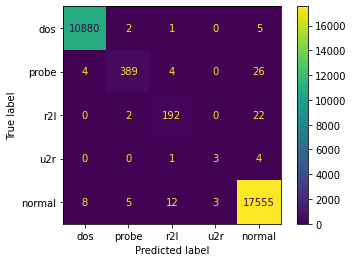

In [881]:
disp.plot()

In [882]:
# summary of model layers
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 10)                1170      
_________________________________________________________________
dense_30 (Dense)             (None, 50)                550       
_________________________________________________________________
dense_31 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_32 (Dense)             (None, 5)                 55        
Total params: 2,285
Trainable params: 2,285
Non-trainable params: 0
_________________________________________________________________


# Model 2: Using All Features

In [893]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(10, input_dim=x_train_full_features.shape[1], activation='relu'))
model.add(Dense(50, input_dim=x_train_full_features.shape[1], activation='relu'))
model.add(Dense(10, input_dim=x_train_full_features.shape[1], activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
model.fit(x_train_full_features,y_train,validation_split=0.5,
          callbacks=[monitor],verbose=2,epochs=1000)

Epoch 1/1000
1820/1820 - 8s - loss: 0.1060 - val_loss: 0.0253
Epoch 2/1000
1820/1820 - 8s - loss: 0.0182 - val_loss: 0.0183
Epoch 3/1000
1820/1820 - 8s - loss: 0.0146 - val_loss: 0.0169
Epoch 4/1000
1820/1820 - 8s - loss: 0.0113 - val_loss: 0.0157
Epoch 5/1000
1820/1820 - 8s - loss: 0.0099 - val_loss: 0.0161
Epoch 6/1000
1820/1820 - 8s - loss: 0.0093 - val_loss: 0.0156
Epoch 7/1000
1820/1820 - 8s - loss: 0.0088 - val_loss: 0.0147
Epoch 8/1000
1820/1820 - 8s - loss: 0.0095 - val_loss: 0.0153
Epoch 9/1000
1820/1820 - 8s - loss: 0.0079 - val_loss: 0.0147
Epoch 10/1000
1820/1820 - 8s - loss: 0.0076 - val_loss: 0.0151
Epoch 11/1000
1820/1820 - 8s - loss: 0.0074 - val_loss: 0.0142
Epoch 12/1000
1820/1820 - 8s - loss: 0.0070 - val_loss: 0.0160
Restoring model weights from the end of the best epoch.
Epoch 00012: early stopping


In [896]:
from sklearn import metrics
pred = model.predict(x_test_full_features)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test.to_numpy(),axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

pred

Validation score: 0.997183872518717


array([0, 4, 4, ..., 4, 4, 4], dtype=int64)

In [897]:
print((y_test['attack_type_R2L'] == 1).sum())
print((y_test['attack_type_U2R'] == 1).sum())
print((y_test['attack_type_Dos'] == 1).sum())
print((y_test['attack_type_normal'] == 1).sum())
print((y_test['attack_type_Probe'] == 1).sum())

216
8
10888
17583
423


In [898]:
cm = confusion_matrix(y_eval, pred)

In [899]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['dos','probe','r2l','u2r','normal'])

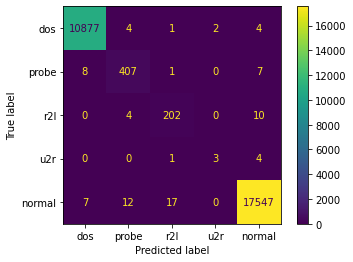

In [900]:
disp.plot()

Epoch 1/1000
2730/2730 - 8s - loss: 0.0756 - val_loss: 0.0210
Epoch 2/1000
2730/2730 - 8s - loss: 0.0188 - val_loss: 0.0142
Epoch 3/1000
2730/2730 - 8s - loss: 0.0136 - val_loss: 0.0159
Epoch 4/1000
2730/2730 - 9s - loss: 0.0115 - val_loss: 0.0108
Epoch 5/1000
2730/2730 - 8s - loss: 0.0100 - val_loss: 0.0123
Epoch 6/1000
2730/2730 - 8s - loss: 0.0091 - val_loss: 0.0116
Epoch 7/1000
2730/2730 - 8s - loss: 0.0084 - val_loss: 0.0117
Epoch 8/1000
2730/2730 - 8s - loss: 0.0082 - val_loss: 0.0118
Epoch 9/1000
2730/2730 - 9s - loss: 0.0076 - val_loss: 0.0102
Restoring model weights from the end of the best epoch.
Epoch 00009: early stopping
Validation score: 0.9971495295006525
216
8
10888
17583
423


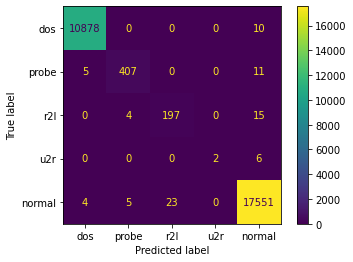

In [903]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(10, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(50, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(10, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
model.fit(x_train,y_train,validation_split=0.25,
          callbacks=[monitor],verbose=2,epochs=1000)

from sklearn import metrics
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test.to_numpy(),axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

pred

print((y_test['attack_type_R2L'] == 1).sum())
print((y_test['attack_type_U2R'] == 1).sum())
print((y_test['attack_type_Dos'] == 1).sum())
print((y_test['attack_type_normal'] == 1).sum())
print((y_test['attack_type_Probe'] == 1).sum())

cm = confusion_matrix(y_eval, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['dos','probe','r2l','u2r','normal'])

disp.plot()

Epoch 1/1000
2730/2730 - 9s - loss: 0.0658 - val_loss: 0.0154
Epoch 2/1000
2730/2730 - 9s - loss: 0.0136 - val_loss: 0.0136
Epoch 3/1000
2730/2730 - 8s - loss: 0.0097 - val_loss: 0.0140
Epoch 4/1000
2730/2730 - 8s - loss: 0.0084 - val_loss: 0.0189
Epoch 5/1000
2730/2730 - 9s - loss: 0.0080 - val_loss: 0.0142
Epoch 6/1000
2730/2730 - 9s - loss: 0.0086 - val_loss: 0.0145
Epoch 7/1000
2730/2730 - 9s - loss: 0.0066 - val_loss: 0.0127
Restoring model weights from the end of the best epoch.
Epoch 00007: early stopping
Validation score: 0.9972182155367814
216
8
10888
17583
423


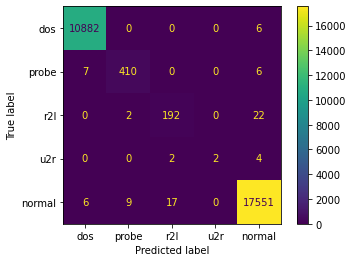

In [904]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(20, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(50, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(10, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
model.fit(x_train,y_train,validation_split=0.25,
          callbacks=[monitor],verbose=2,epochs=1000)

from sklearn import metrics
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test.to_numpy(),axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

pred

print((y_test['attack_type_R2L'] == 1).sum())
print((y_test['attack_type_U2R'] == 1).sum())
print((y_test['attack_type_Dos'] == 1).sum())
print((y_test['attack_type_normal'] == 1).sum())
print((y_test['attack_type_Probe'] == 1).sum())

cm = confusion_matrix(y_eval, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['dos','probe','r2l','u2r','normal'])

disp.plot()

Epoch 1/1000
3094/3094 - 9s - loss: 0.0561 - val_loss: 0.0130
Epoch 2/1000
3094/3094 - 8s - loss: 0.0131 - val_loss: 0.0114
Epoch 3/1000
3094/3094 - 9s - loss: 0.0103 - val_loss: 0.0112
Epoch 4/1000
3094/3094 - 9s - loss: 0.0084 - val_loss: 0.0083
Epoch 5/1000
3094/3094 - 8s - loss: 0.0077 - val_loss: 0.0115
Epoch 6/1000
3094/3094 - 8s - loss: 0.0073 - val_loss: 0.0072
Epoch 7/1000
3094/3094 - 9s - loss: 0.0072 - val_loss: 0.0070
Epoch 8/1000
3094/3094 - 8s - loss: 0.0065 - val_loss: 0.0066
Epoch 9/1000
3094/3094 - 10s - loss: 0.0060 - val_loss: 0.0069
Epoch 10/1000
3094/3094 - 9s - loss: 0.0058 - val_loss: 0.0076
Epoch 11/1000
3094/3094 - 10s - loss: 0.0055 - val_loss: 0.0064
Restoring model weights from the end of the best epoch.
Epoch 00011: early stopping
Validation score: 0.9981798200425853
216
8
10888
17583
423


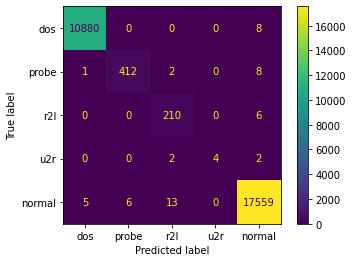

In [906]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(20, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(50, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(10, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
model.fit(x_train,y_train,validation_split=0.15,
          callbacks=[monitor],verbose=2,epochs=1000)

from sklearn import metrics
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test.to_numpy(),axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

pred

print((y_test['attack_type_R2L'] == 1).sum())
print((y_test['attack_type_U2R'] == 1).sum())
print((y_test['attack_type_Dos'] == 1).sum())
print((y_test['attack_type_normal'] == 1).sum())
print((y_test['attack_type_Probe'] == 1).sum())

cm = confusion_matrix(y_eval, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['dos','probe','r2l','u2r','normal'])

disp.plot()

Epoch 1/1000
3276/3276 - 9s - loss: 0.0620 - val_loss: 0.0177
Epoch 2/1000
3276/3276 - 9s - loss: 0.0144 - val_loss: 0.0105
Epoch 3/1000
3276/3276 - 8s - loss: 0.0108 - val_loss: 0.0088
Epoch 4/1000
3276/3276 - 8s - loss: 0.0089 - val_loss: 0.0078
Epoch 5/1000
3276/3276 - 9s - loss: 0.0083 - val_loss: 0.0074
Epoch 6/1000
3276/3276 - 7s - loss: 0.0076 - val_loss: 0.0058
Epoch 7/1000
3276/3276 - 7s - loss: 0.0068 - val_loss: 0.0066
Epoch 8/1000
3276/3276 - 10s - loss: 0.0072 - val_loss: 0.0060
Epoch 9/1000
3276/3276 - 7s - loss: 0.0060 - val_loss: 0.0069
Epoch 10/1000
3276/3276 - 6s - loss: 0.0060 - val_loss: 0.0071
Epoch 11/1000
3276/3276 - 6s - loss: 0.0057 - val_loss: 0.0071
Restoring model weights from the end of the best epoch.
Epoch 00011: early stopping
Validation score: 0.9978020468438766
216
8
10888
17583
423


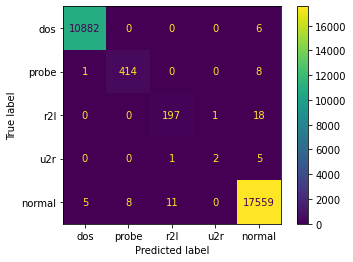

In [909]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(20, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(50, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(20, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
model.fit(x_train,y_train,validation_split=0.1,
          callbacks=[monitor],verbose=2,epochs=1000)

from sklearn import metrics
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test.to_numpy(),axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

pred

print((y_test['attack_type_R2L'] == 1).sum())
print((y_test['attack_type_U2R'] == 1).sum())
print((y_test['attack_type_Dos'] == 1).sum())
print((y_test['attack_type_normal'] == 1).sum())
print((y_test['attack_type_Probe'] == 1).sum())

cm = confusion_matrix(y_eval, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['dos','probe','r2l','u2r','normal'])

disp.plot()

Epoch 1/1000
3094/3094 - 8s - loss: 0.0598 - val_loss: 0.0143
Epoch 2/1000
3094/3094 - 8s - loss: 0.0136 - val_loss: 0.0114
Epoch 3/1000
3094/3094 - 9s - loss: 0.0106 - val_loss: 0.0085
Epoch 4/1000
3094/3094 - 8s - loss: 0.0084 - val_loss: 0.0076
Epoch 5/1000
3094/3094 - 9s - loss: 0.0083 - val_loss: 0.0091
Epoch 6/1000
3094/3094 - 9s - loss: 0.0071 - val_loss: 0.0151
Epoch 7/1000
3094/3094 - 8s - loss: 0.0065 - val_loss: 0.0086
Epoch 8/1000
3094/3094 - 9s - loss: 0.0064 - val_loss: 0.0073
Epoch 9/1000
3094/3094 - 9s - loss: 0.0057 - val_loss: 0.0104
Epoch 10/1000
3094/3094 - 9s - loss: 0.0060 - val_loss: 0.0090
Epoch 11/1000
3094/3094 - 9s - loss: 0.0055 - val_loss: 0.0085
Epoch 12/1000
3094/3094 - 9s - loss: 0.0053 - val_loss: 0.0096
Epoch 13/1000
3094/3094 - 9s - loss: 0.0052 - val_loss: 0.0099
Restoring model weights from the end of the best epoch.
Epoch 00013: early stopping
Validation score: 0.9978707328800055
216
8
10888
17583
423


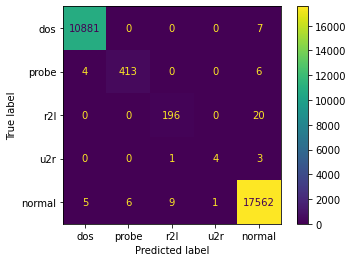

In [912]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(20, input_dim=x_train_full_features.shape[1], activation='relu'))
model.add(Dense(50, input_dim=x_train_full_features.shape[1], activation='relu'))
model.add(Dense(10, input_dim=x_train_full_features.shape[1], activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
model.fit(x_train_full_features,y_train,validation_split=0.15,
          callbacks=[monitor],verbose=2,epochs=1000)

from sklearn import metrics
pred = model.predict(x_test_full_features)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test.to_numpy(),axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

pred

print((y_test['attack_type_R2L'] == 1).sum())
print((y_test['attack_type_U2R'] == 1).sum())
print((y_test['attack_type_Dos'] == 1).sum())
print((y_test['attack_type_normal'] == 1).sum())
print((y_test['attack_type_Probe'] == 1).sum())

cm = confusion_matrix(y_eval, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['dos','probe','r2l','u2r','normal'])

disp.plot()

# Increasing Layers

Epoch 1/1000
3094/3094 - 11s - loss: 0.0490 - val_loss: 0.0133
Epoch 2/1000
3094/3094 - 10s - loss: 0.0130 - val_loss: 0.0111
Epoch 3/1000
3094/3094 - 10s - loss: 0.0115 - val_loss: 0.0097
Epoch 4/1000
3094/3094 - 10s - loss: 0.0084 - val_loss: 0.0092
Epoch 5/1000
3094/3094 - 10s - loss: 0.0085 - val_loss: 0.0089
Epoch 6/1000
3094/3094 - 10s - loss: 0.0072 - val_loss: 0.0067
Epoch 7/1000
3094/3094 - 11s - loss: 0.0072 - val_loss: 0.0076
Epoch 8/1000
3094/3094 - 10s - loss: 0.0063 - val_loss: 0.0083
Epoch 9/1000
3094/3094 - 9s - loss: 0.0064 - val_loss: 0.0062
Epoch 10/1000
3094/3094 - 10s - loss: 0.0058 - val_loss: 0.0091
Epoch 11/1000
3094/3094 - 10s - loss: 0.0056 - val_loss: 0.0093
Restoring model weights from the end of the best epoch.
Epoch 00011: early stopping
Validation score: 0.9977333608077478
216
8
10888
17583
423


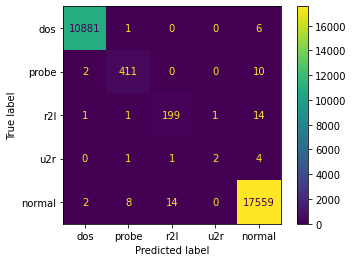

In [925]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(20, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(100, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(50, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(25, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
model.fit(x_train,y_train,validation_split=0.15,
          callbacks=[monitor],verbose=2,epochs=1000)

from sklearn import metrics
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test.to_numpy(),axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

pred

print((y_test['attack_type_R2L'] == 1).sum())
print((y_test['attack_type_U2R'] == 1).sum())
print((y_test['attack_type_Dos'] == 1).sum())
print((y_test['attack_type_normal'] == 1).sum())
print((y_test['attack_type_Probe'] == 1).sum())

cm = confusion_matrix(y_eval, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['dos','probe','r2l','u2r','normal'])

disp.plot()

Epoch 1/1000
3094/3094 - 10s - loss: 0.0540 - val_loss: 0.0137
Epoch 2/1000
3094/3094 - 10s - loss: 0.0139 - val_loss: 0.0119
Epoch 3/1000
3094/3094 - 10s - loss: 0.0115 - val_loss: 0.0114
Epoch 4/1000
3094/3094 - 10s - loss: 0.0089 - val_loss: 0.0106
Epoch 5/1000
3094/3094 - 10s - loss: 0.0086 - val_loss: 0.0083
Epoch 6/1000
3094/3094 - 10s - loss: 0.0075 - val_loss: 0.0072
Epoch 7/1000
3094/3094 - 10s - loss: 0.0072 - val_loss: 0.0082
Epoch 8/1000
3094/3094 - 10s - loss: 0.0071 - val_loss: 0.0092
Epoch 9/1000
3094/3094 - 10s - loss: 0.0069 - val_loss: 0.0121
Epoch 10/1000
3094/3094 - 10s - loss: 0.0069 - val_loss: 0.0110
Epoch 11/1000
3094/3094 - 9s - loss: 0.0062 - val_loss: 0.0114
Restoring model weights from the end of the best epoch.
Epoch 00011: early stopping
Validation score: 0.9981111340064565
216
8
10888
17583
423


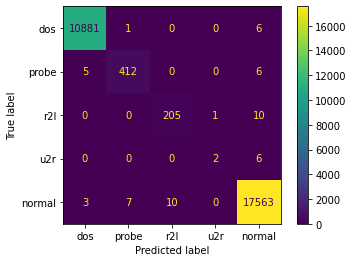

In [926]:
model = Sequential()
model.add(Dense(20, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(100, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(50, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(30, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
model.fit(x_train,y_train,validation_split=0.15,
          callbacks=[monitor],verbose=2,epochs=1000)

from sklearn import metrics
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test.to_numpy(),axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

pred

print((y_test['attack_type_R2L'] == 1).sum())
print((y_test['attack_type_U2R'] == 1).sum())
print((y_test['attack_type_Dos'] == 1).sum())
print((y_test['attack_type_normal'] == 1).sum())
print((y_test['attack_type_Probe'] == 1).sum())

cm = confusion_matrix(y_eval, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['dos','probe','r2l','u2r','normal'])

disp.plot()

Epoch 1/1000
2730/2730 - 10s - loss: 0.0528 - val_loss: 0.0142
Epoch 2/1000
2730/2730 - 10s - loss: 0.0128 - val_loss: 0.0163
Epoch 3/1000
2730/2730 - 10s - loss: 0.0110 - val_loss: 0.0136
Epoch 4/1000
2730/2730 - 10s - loss: 0.0089 - val_loss: 0.0149
Epoch 5/1000
2730/2730 - 10s - loss: 0.0086 - val_loss: 0.0188
Epoch 6/1000
2730/2730 - 10s - loss: 0.0084 - val_loss: 0.0125
Epoch 7/1000
2730/2730 - 10s - loss: 0.0074 - val_loss: 0.0127
Epoch 8/1000
2730/2730 - 10s - loss: 0.0072 - val_loss: 0.0114
Epoch 9/1000
2730/2730 - 10s - loss: 0.0062 - val_loss: 0.0158
Epoch 10/1000
2730/2730 - 10s - loss: 0.0065 - val_loss: 0.0163
Epoch 11/1000
2730/2730 - 10s - loss: 0.0063 - val_loss: 0.0129
Epoch 12/1000
2730/2730 - 10s - loss: 0.0060 - val_loss: 0.0171
Epoch 13/1000
2730/2730 - 10s - loss: 0.0055 - val_loss: 0.0259
Restoring model weights from the end of the best epoch.
Epoch 00013: early stopping
Validation score: 0.9977677038258123
216
8
10888
17583
423


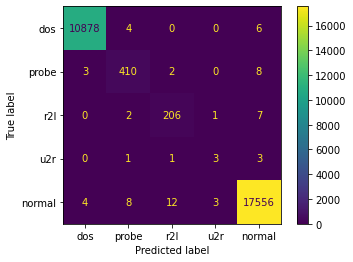

In [934]:
model = Sequential()
model.add(Dense(20, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(100, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(60, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(30, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto',
                           restore_best_weights=True)
model.fit(x_train,y_train,validation_split=0.25,
          callbacks=[monitor],verbose=2,epochs=1000)

from sklearn import metrics
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test.to_numpy(),axis=1)
score = metrics.accuracy_score(y_eval, pred)
print("Validation score: {}".format(score))

pred

print((y_test['attack_type_R2L'] == 1).sum())
print((y_test['attack_type_U2R'] == 1).sum())
print((y_test['attack_type_Dos'] == 1).sum())
print((y_test['attack_type_normal'] == 1).sum())
print((y_test['attack_type_Probe'] == 1).sum())

cm = confusion_matrix(y_eval, pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['dos','probe','r2l','u2r','normal'])

disp.plot()

In [ ]:
# Graphs